- 프롬프트 명령어에 pip install easyocr

In [1]:
!pip install git+https://github.com/JaideAI/EasyOCR.git

  Cloning https://github.com/JaideAI/EasyOCR.git to c:\users\itsc\appdata\local\temp\pip-req-build-cqjp0bdc


  Running command git clone --filter=blob:none --quiet https://github.com/JaideAI/EasyOCR.git 'C:\Users\ITSC\AppData\Local\Temp\pip-req-build-cqjp0bdc'
  remote: Repository not found.
  fatal: repository 'https://github.com/JaideAI/EasyOCR.git/' not found
  error: subprocess-exited-with-error
  
  git clone --filter=blob:none --quiet https://github.com/JaideAI/EasyOCR.git 'C:\Users\ITSC\AppData\Local\Temp\pip-req-build-cqjp0bdc' did not run successfully.
  exit code: 128
  
  See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

git clone --filter=blob:none --quiet https://github.com/JaideAI/EasyOCR.git 'C:\Users\ITSC\AppData\Local\Temp\pip-req-build-cqjp0bdc' did not run successfully.
exit code: 128

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

In [5]:
reader = easyocr.Reader(['ko', 'en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |--------------------------------------------------| 1.5% Complete

Progress: |███-----------------------------------------------| 7.9% Complete

Progress: |███████-------------------------------------------| 14.5% Complete

Progress: |█████████-----------------------------------------| 19.9% Complete

Progress: |█████████████-------------------------------------| 26.2% Complete

Progress: |████████████████----------------------------------| 33.1% Complete

Progress: |████████████████████------------------------------| 40.1% Complete

Progress: |███████████████████████---------------------------| 47.2% Complete

Progress: |███████████████████████████-----------------------| 54.3% Complete

Progress: |██████████████████████████████--------------------| 61.4% Complete

Progress: |██████████████████████████████████----------------| 68.4% Complete

Progress: |█████████████████████████████████████-------------| 75.9% Complete

Progress: |█████████████████████████████████████████---------| 83.6% Complete

Progress: |█████████████████████████████████████████████-----| 91.1% Complete

Progress: |█████████████████████████████████████████████████-| 98.7% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████--------------------------------------------| 12.1% Complete

Progress: |███████████████████████---------------------------| 46.6% Complete

Progress: |████████████████████████████████████████----------| 81.8% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [6]:
result = reader.readtext('./image/dobby.jpg')

In [9]:
result

[([[98, 403], [508, 403], [508, 483], [98, 483]],
  'Dobby is ffiree!',
  0.49031699689570846),
 ([[78, 474], [534, 474], [534, 548], [78, 548]],
  '도비는 자율예요',
  0.8375594777233835)]

In [16]:
img = cv2.imread('./image/dobby.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [17]:
img = Image.fromarray(img)
font = ImageFont.truetype('fonts/HMKMRHD.TTF', 20)
draw = ImageDraw.Draw(img)

In [18]:
COLORS = np.random.randint(0, 255, size = (255, 3), dtype = 'uint8')

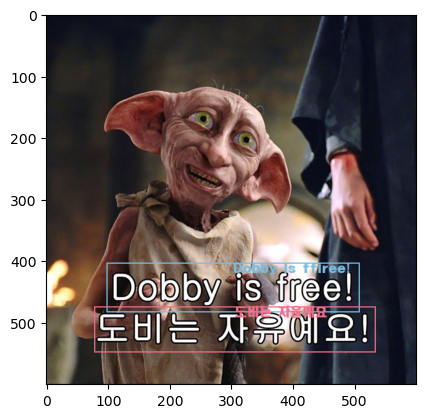

In [19]:
for i in result:
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]
    
    color_idx = random.randint(0, 255)
    color = [int(c) for c in COLORS[color_idx]]
    
    draw.rectangle(((x, y), (x + w, y +h)), outline = tuple(color), width=  2)
    draw.text((int((x + x+ w) / 2), y - 2), str(i[1]), font= font, fill=tuple(color),)
              
plt.imshow(img)
plt.show()